In [34]:
import xgboost as xgb
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from sklearn.model_selection import GridSearchCV
from keras.layers import LSTM
import tensorflow as tf
import time
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Complete_large.csv')
data.head()

Index                                     Address  FLAG  \
0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  max value received   \
0                       118            0.000000            45.806785   
1                        14            0.000000             2.613269   
2                         2            0.113119             1.165453   
3                        13            0.000000           500.000000   
4                        19            0.000000            12.802411   

   avg val received  min val sent  max val sent  avg val sent  \
0          6.589513          0.00     31.220000      1.200681   
1          0.385685          0.00      1.800000      0.032844   
2          0.358906          0.05      3.538616      1.794308   
3         99.488840          0.00    450.000000     70.001834   
4          2.671095          0.00      9.000000      0.022688   

   min value sent to contract  max val sent to contract  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   avg value sent to contract  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   total transactions (including tnx to create contract  total Ether sent  \
0                                                810           865.691093   
1                                                102             3.087297   
2                                                 12             3.588616   
3                                                 34          1750.045862   
4                                               4619           104.318883   

   total ether received  total ether sent contracts  total ether balance  \
0            586.466675                         0.0          -279.224419   
1              3.085478                         0.0            -0.001819   
2              3.589057                         0.0             0.000441   
3            895.399559                         0.0          -854.646303   
4             53.421897                         0.0           -50.896986   

    Total ERC20 tnxs   ERC20 total Ether received   ERC20 total ether sent  \
0              265.0                 3.558854e+07             3.56031

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

In [4]:
data.select_dtypes('object')

Address  \
0            0x00009277775ac7d0d59eaad8fee3d10ac6c805e8   
1            0x0002b44ddb1476db43c868bd494422ee4c136fed   
2            0x0002bda54cb772d040f779e88eb453cac0daa244   
3            0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e   
4            0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89   
5            0x000895ad78f4403ecd9468900e68d6ee506136fd   
6            0x000d63fc5df52b0204374c2f5a3249779805d5d1   
7            0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d   
8            0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4   
9            0x0012f247c9f980eea0a9ad06893bfd95c3145794   
10           0x0013e58a315d2e728f11630aa40abfbdddcab304   
11           0x0016338abcb6bfa6d355adc207c5d2d42acb5e42   
12           0x001b28141562bc2601694d27c3f5fda2c06c234c   
13           0x001cb265c5606d79035059686ae5f94c6a4c2c2c   
14           0x001cf9871aeaf2acf72f144b16818b7e417b6dda   
15           0x001d54f72af6eae0fdd17009c391426754bec5c2   
16           0x001e6fbcd020823d3161df44bb5da6c34419eecb   
17           0x001eb1e90d25e8c1372c38f2b2a36b49b6634235   
18           0x001f357ca93307571d8cd93d09ce25a3660429af   
19           0x001f99982965a3792077893ecadc7be0c61d613c   
20           0x00235134f8335d48cf506b25cc376fc84520588b   
21           0x0023a6a2c8316ccfb083a194aa5668bd75891455   
22           0x0029a9b2ea1e45e32fb6344b117388515858d040   
23           0x002a68f53b92cef5ee4e7ce015b78408f20942bb   
24           0x002ab919205b134d05d0746e22c7f8000523c660   
25           0x002b043689ad84008fffab16afc1955f5a3aebde   
26           0x0031ebb20a0aaf8c67be012bb3a3483d75269635   
27           0x003300d3d2c46983b9a55b07b9b2ab47d6228111   
28           0x0033fd555da940b923a7f6f465cc4d9088724263   
29           0x0034f7473531239b1799bc7f14ff97d5303a5a93   
30           0x0036ed1e6299bb586ac70ebdfa336f06714a9556   
31           0x0038ab9bf479faa2997522b3cf9492153ea6b33f   
32           0x003b9a44dcc7b59546a8b1c1e7dccd57eb99f07d   
33           0x003c5ebfa5cdb3d73bad42bb07db823f6c77a236   
34           0x003d8b1e6723960d60367a719fe65e08643a2a80   
35           0x003e2b1599587a6c2f38928ea8f874a74fb1bbbc   
36           0x004534ebd59b0b094da701dbfd952ef605470128   
37           0x0045eb75acf6e1cb1d9ec41e352a879e2cd50b35   
38           0x00462f4a169c1dc0b9dc428aa37d394c8abf1266   
39           0x00472c1e4275230354dbe5007a5976053f12610a   
40           0x004853f00fab90ab60cf1e609b0b61494b90164c   
41           0x004e1c2a12ac1d0b70907c702892f397a4769bfb   
42           0x004f1cea50b057ad8b6f445e128edbdc9b48902b   
43           0x005073a74dd37889bebbf9de7550dea7666f625b   
44           0x005457078e3c355023433874edffc8b254881334   
45           0x00595d5ec3bb583428a0304b2940a70d7f553aef   
46           0x0059782ecd69fb5413c5e1a98b40c28dff061162   
47           0x005b98bb53be9d5789d27aa1c69ec8a789eff9c1   
48           0x005cb96b96c8fe801f89500df6ee38dc5fa0081f   
49           0x005d3bffd33b1a012279d25d30f75133584404db   
50           0x006482de8230af0f8e2918a439c7826fe8642a43   
51           0x006743c8992ca6d54c23fa3a745a4781b3817f0c   
52           0x0067e167caf808eaa6f642d9232e54ff7bb47c07   
53           0x006aaaff2ff3358bc8453febaba4e236b028df80   
54           0x007174732705604bbbf77038332dc52fd5a5000c   
55           0x0071763e7e796eeb4c32f083aa4a3ac2f33bf5c0   
56           0x0071c78d72b78818b0d507c114674a7ce6bc4f18   
57           0x00733965a4f189034c4cd0e7d38c877a34ba0b63   
58           0x00760b09a77e7a4f6ea7e7fdf17f93f8d898c870   
59           0x00761aebf8420f0325f7d3a9161a8bb6a96e550b   
60           0x007a010f85605b7f9ecd0e26a7cfa3987bb3e43f   
61           0x007bb0518b03f1a8c00e9bb545640800d1e91444   
62           0x007cafba4edd0e25a664530e3cac0ffadb101fd8   
63           0x0080214c803a073c18aaadd7b99cfd08c3945b09   
64           0x0080359f18daa3f2906e347a589ffd49c07c6258   
65           0x0083704ad2f3e9f58e71593459462875255b7bd2   
66           0x00893fa05c19ce3895d0d5577db0ddb02d5cbd47   
67           0x0095e1a57555e5d5e9ee0

In [5]:
d = pd.DataFrame(data.isna().sum())
d = d.reset_index()
d.columns = ['col', 'missingno']

In [6]:
d[d['missingno']<=10]

col  missingno
0                                               Index          0
1                                             Address          0
2                                                FLAG          0
3                            Avg min between sent tnx          0
4                        Avg min between received tnx          0
5             Time Diff between first and last (Mins)          0
6                                            Sent tnx          0
7                                        Received Tnx          0
8                         Number of Created Contracts          0
9                      Unique Received From Addresses          0
10                           Unique Sent To Addresses          0
11                                 min value received          0
12                                max value received           0
13                                   avg val received          0
14                                       min val sent          0
15                                       max val sent          0
16                                       avg val sent          0
17                         min value sent to contract          0
18                           max val sent to contract          0
19                         avg value sent to contract          0
20  total transactions (including tnx to create co...          0
21                                   total Ether sent          0
22                               total ether received          0
23                         total ether sent contracts          0
24                                total ether balance          0

In [7]:
d

col  missingno
0                                               Index          0
1                                             Address          0
2                                                FLAG          0
3                            Avg min between sent tnx          0
4                        Avg min between received tnx          0
5             Time Diff between first and last (Mins)          0
6                                            Sent tnx          0
7                                        Received Tnx          0
8                         Number of Created Contracts          0
9                      Unique Received From Addresses          0
10                           Unique Sent To Addresses          0
11                                 min value received          0
12                                max value received           0
13                                   avg val received          0
14                                       min val sent          0
15                                       max val sent          0
16                                       avg val sent          0
17                         min value sent to contract          0
18                           max val sent to contract          0
19                         avg value sent to contract          0
20  total transactions (including tnx to create co...          0
21                                   total Ether sent          0
22                               total ether received          0
23                         total ether sent contracts          0
24                                total ether balance          0
25                                   Total ERC20 tnxs        829
26                         ERC20 total Ether received        829
27                             ERC20 total ether sent        829
28                    ERC20 total Ether sent contract        829
29                               ERC20 uniq sent addr        829
30                                ERC20 uniq rec addr        829
31                             ERC20 uniq sent addr.1        829
32                       ERC20 uniq rec contract addr        829
33                    ERC20 avg time between sent tnx        829
34                     ERC20 avg time between rec tnx        829
35                   ERC20 avg time between rec 2 tnx        829
36                ERC20 avg time between contract tnx        829
37                                  ERC20 min val rec        829
38                                  ERC20 max val rec        829
39                                  ERC20 avg val rec        829
40                                 ERC20 min val sent        829
41                                 ERC20 max val sent        829
42                                 ERC20 avg val sent        829
43                        ERC20 min val sent contract        829
44                        ERC20 max val sent contract        829
45                        ERC20 avg val sent contract        829
46                         ERC20 uniq sent token name        829
47                          ERC20 uniq rec token name        829
48                         ERC20 most sent token type        841
49                          ERC20_most_rec_token_type        851

In [8]:
d = d[d['missingno']<=10]
new_data = data[d.col]

In [9]:
pd.DataFrame(data.isna().sum())

0
Index                                                 0
Address                                               0
FLAG                                                  0
Avg min between sent tnx                              0
Avg min between received tnx                          0
Time Diff between first and last (Mins)               0
Sent tnx                                              0
Received Tnx                                          0
Number of Created Contracts                           0
Unique Received From Addresses                        0
Unique Sent To Addresses                              0
min value received                                    0
max value received                                    0
avg val received                                      0
min val sent                                          0
max val sent                                          0
avg val sent                                          0
min value sent to contract                            0
max val sent to contract                              0
avg value sent to contract                            0
total transactions (including tnx to create con...    0
total Ether sent                                      0
total ether received                                  0
total ether sent contracts                            0
total ether balance                                   0
 Total ERC20 tnxs                                   829
 ERC20 total Ether received                         829
 ERC20 total ether sent                             829
 ERC20 total Ether sent contract                    829
 ERC20 uniq sent addr                               829
 ERC20 uniq rec addr                                829
 ERC20 uniq sent addr.1                             829
 ERC20 uniq rec contract addr                       829
 ERC20 avg time between sent tnx                    829
 ERC20 avg time between rec tnx                     829
 ERC20 avg time between rec 2 tnx                   829
 ERC20 avg time between contract tnx                829
 ERC20 min val rec                                  829
 ERC20 max val rec                                  829
 ERC20 avg val rec                                  829
 ERC20 min val sent                                 829
 ERC20 max val sent                                 829
 ERC20 avg val sent                                 829
 ERC20 min val sent contract                        829
 ERC20 max val sent contract                        829
 ERC20 avg val sent contract                        829
 ERC20 uniq sent token name                         829
 ERC20 uniq rec token name                          829
 ERC20 most sent token type                         841
 ERC20_most_rec_token_type                          851

In [10]:
pd.DataFrame(data.isna().sum())

0
Index                                                 0
Address                                               0
FLAG                                                  0
Avg min between sent tnx                              0
Avg min between received tnx                          0
Time Diff between first and last (Mins)               0
Sent tnx                                              0
Received Tnx                                          0
Number of Created Contracts                           0
Unique Received From Addresses                        0
Unique Sent To Addresses                              0
min value received                                    0
max value received                                    0
avg val received                                      0
min val sent                                          0
max val sent                                          0
avg val sent                                          0
min value sent to contract                            0
max val sent to contract                              0
avg value sent to contract                            0
total transactions (including tnx to create con...    0
total Ether sent                                      0
total ether received                                  0
total ether sent contracts                            0
total ether balance                                   0
 Total ERC20 tnxs                                   829
 ERC20 total Ether received                         829
 ERC20 total ether sent                             829
 ERC20 total Ether sent contract                    829
 ERC20 uniq sent addr                               829
 ERC20 uniq rec addr                                829
 ERC20 uniq sent addr.1                             829
 ERC20 uniq rec contract addr                       829
 ERC20 avg time between sent tnx                    829
 ERC20 avg time between rec tnx                     829
 ERC20 avg time between rec 2 tnx                   829
 ERC20 avg time between contract tnx                829
 ERC20 min val rec                                  829
 ERC20 max val rec                                  829
 ERC20 avg val rec                                  829
 ERC20 min val sent                                 829
 ERC20 max val sent                                 829
 ERC20 avg val sent                                 829
 ERC20 min val sent contract                        829
 ERC20 max val sent contract                        829
 ERC20 avg val sent contract                        829
 ERC20 uniq sent token name                         829
 ERC20 uniq rec token name                          829
 ERC20 most sent token type                         841
 ERC20_most_rec_token_type                          851

In [11]:
d

col  missingno
0                                               Index          0
1                                             Address          0
2                                                FLAG          0
3                            Avg min between sent tnx          0
4                        Avg min between received tnx          0
5             Time Diff between first and last (Mins)          0
6                                            Sent tnx          0
7                                        Received Tnx          0
8                         Number of Created Contracts          0
9                      Unique Received From Addresses          0
10                           Unique Sent To Addresses          0
11                                 min value received          0
12                                max value received           0
13                                   avg val received          0
14                                       min val sent          0
15                                       max val sent          0
16                                       avg val sent          0
17                         min value sent to contract          0
18                           max val sent to contract          0
19                         avg value sent to contract          0
20  total transactions (including tnx to create co...          0
21                                   total Ether sent          0
22                               total ether received          0
23                         total ether sent contracts          0
24                                total ether balance          0

In [12]:
new_data.sample(10)

Index                                     Address  FLAG  \
538     539  0x0cc49a5535e9463b7078198e4e3a951a5cde717b     0   
5839   2907  0x9c106eff7f1150fe6a5b5d8682b54a5b53f07431     0   
3821    889  0x659d1c17e8e174f985c5974f9deacfb8da9199f7     0   
5578   2646  0x94540fcffbfb4134ebe22faa9a4228eb726e8ded     0   
3723    791  0x62fe736560ac70131cec88863f257dccd8f513a8     0   
3433    501  0x5aa91d371648d726d8888d92343bc75d1d4e8c60     0   
1609   1610  0x29b9e71433252fdf6d191de36b6e08979022aef1     0   
3757    825  0x63ed8dba9ff7656bd366cf4335335d49bbb96265     0   
415     416  0x093d4ac2055b55b05c6e92dcc823d00e57a074f7     0   
5988   3056  0xa04d2003430717fc9820e97d0e8c85fecc9dfafa     0   

      Avg min between sent tnx  Avg min between received tnx  \
538                   17517.21                       9672.30   
5839                      4.46                      53727.44   
3821                      1.51                          0.28   
5578                   6226.86                       1675.52   
3723                    159.59                          0.00   
3433                    162.32                          0.30   
1609                  84409.80                       5587.89   
3757                   1244.55                       5693.13   
415                     310.33                       5005.28   
5988                    163.26                          0.30   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
538                                 392152.93        13            17   
5839                                161195.70         3             3   
3821                                     5.08         3             2   
5578                                929903.80       134            57   
3723                                   319.18         2             1   
3433                                   325.23         2             2   
1609                                415869.70         4            14   
3757                                523026.50        36            84   
415                                 874362.07       124           167   
5988                                   327.12         2             2   

      Number of Created Contracts  Unique Received From Addresses  \
538                             0                              13   
5839                            0                               2   
3821                            0                               2   
5578                            0                              15   
3723                            0                               1   
3433                            0                               2   
1609                            0                               2   
3757                            0                              21   
415                             0                               5   
5988                            0                               2   

      Unique Sent To Addresses  min value received  max value received   \
538                         12            0.004066             7.495000   
5839                         1            1.074525             2.100000   
3821                         3          425.220241          1575.779759   
5578                        48            0.005000            16.461612   
3723                         2          101.000000           101.000000   
3433                         2           49.826162            51.173838   
1609                         3            0.990000            12.990000   
3757                        15            0.003000           350.000000   
415                          2            0.049002            25.500000   
5988                         2           21.822004            79.177996   

      avg val received  min val sent  max val sent  avg val sent  \
538           1.650545      0.369547      7.498650      2.157884   
5839          1.417886      1.073863      2.099360      1.4

In [13]:
cat_col = new_data.select_dtypes('object')


In [14]:
cat_col.head()

Address
0  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8
1  0x0002b44ddb1476db43c868bd494422ee4c136fed
2  0x0002bda54cb772d040f779e88eb453cac0daa244
3  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e
4  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89

In [15]:
cat_col_features = cat_col.columns

In [16]:
cat_col_features

Index(['Address'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
cat_col = cat_col.apply(LabelEncoder().fit_transform)

    

In [18]:
cat_col.head()

Address
0        0
1        1
2        2
3        3
4        4

In [19]:
new_data.drop(cat_col_features, axis=1, inplace=True)
new_data = pd.concat([new_data,  cat_col],  axis=1)

In [20]:
new_data.head()

Index  FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      1     0                    844.26                       1093.71   
1      2     0                  12709.07                       2958.44   
2      3     0                 246194.54                       2434.02   
3      4     0                  10219.60                      15785.09   
4      5     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  max value received   \
0                       118            0.000000            45.806785   
1                        14            0.000000             2.613269   
2                         2            0.113119             1.165453   
3                        13            0.000000           500.000000   
4                        19            0.000000            12.802411   

   avg val received  min val sent  max val sent  avg val sent  \
0          6.589513          0.00     31.220000      1.200681   
1          0.385685          0.00      1.800000      0.032844   
2          0.358906          0.05      3.538616      1.794308   
3         99.488840          0.00    450.000000     70.001834   
4          2.671095          0.00      9.000000      0.022688   

   min value sent to contract  max val sent to contract  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   avg value sent to contract  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   total transactions (including tnx to create contract  total Ether sent  \
0                                                810           865.691093   
1                                                102             3.087297   
2                                                 12             3.588616   
3                                                 34          1750.045862   
4                                               4619           104.318883   

   total ether received  total ether sent contracts  total ether balance  \
0            586.466675                         0.0          -279.224419   
1              3.085478                         0.0            -0.001819   
2              3.589057                         0.0             0.000441   
3            895.399559                         0.0          -854.646303   
4             53.421897                         0.0           -50.896986   

   Address  
0        0  
1        1  
2        2  
3        3  
4        4

In [21]:
new_data.dropna(inplace=True, axis=0)

In [22]:
new_data.isna().sum()

Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent t

In [23]:
new_data.FLAG.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [27]:
y = new_data['FLAG']

In [28]:
X = new_data.drop('FLAG', axis=1)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [37]:
X_train.shape

(7872, 1, 24)

In [43]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=X_train.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

In [44]:
model = KerasRegressor(build_fn=create_model, verbose=1)

batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
n_splits = 5
tscv = 5
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,  verbose=2) 

grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50
394/394 [==============================] - 2s 1ms/step - loss: 0.8275 - accuracy: 0.7783
Epoch 2/50
394/394 [==============================] - 1s 1ms/step - loss: 0.5664 - accuracy: 0.7783
Epoch 3/50
394/394 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7783
Epoch 4/50
394/394 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.7783
Epoch 5/50
394/394 [==============================] - 1s 1ms/step - loss: 0.4776 - accuracy: 0.7783
Epoch 6/50
394/394 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.7788
Epoch 7/50
394/394 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.7975
Epoch 8/50
394/394 [==============================] - 1s 2ms/step - loss: 0.3130 - accuracy: 0.8830
Epoch 9/50
394/394 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8742
Epoch 10/50
394/394 [===================

394/394 [==============================] - 1s 1ms/step - loss: 0.1667 - accuracy: 0.9273
Epoch 31/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1623 - accuracy: 0.9301
Epoch 32/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1658 - accuracy: 0.9257
Epoch 33/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1655 - accuracy: 0.9300
Epoch 34/50
394/394 [==============================] - 1s 2ms/step - loss: 0.1574 - accuracy: 0.9293
Epoch 35/50
394/394 [==============================] - 1s 2ms/step - loss: 0.1600 - accuracy: 0.9298
Epoch 36/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1482 - accuracy: 0.9377
Epoch 37/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1661 - accuracy: 0.9295
Epoch 38/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1592 - accuracy: 0.9339
Epoch 39/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1522 - accuracy: 0.9376
Ep

394/394 [==============================] - 1s 1ms/step - loss: 0.1898 - accuracy: 0.9119
Epoch 9/50
394/394 [==============================] - 1s 2ms/step - loss: 0.1827 - accuracy: 0.9200
Epoch 10/50
394/394 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9239
Epoch 11/50
394/394 [==============================] - 1s 2ms/step - loss: 0.1762 - accuracy: 0.9274
Epoch 12/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1937 - accuracy: 0.9176
Epoch 13/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.9233
Epoch 14/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1775 - accuracy: 0.9257
Epoch 15/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1703 - accuracy: 0.9301
Epoch 16/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1627 - accuracy: 0.9335
Epoch 17/50
394/394 [==============================] - 1s 1ms/step - loss: 0.1450 - accuracy: 0.9400
Epo

394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 38/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 39/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 40/50
394/394 [==============================] - 1s 2ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 41/50
394/394 [==============================] - 1s 2ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 42/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 43/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 44/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 45/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 46/50
394/394 [==============================] - 1s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Ep

394/394 [==============================] - 1s 1ms/step - loss: 0.1526 - accuracy: 0.9412
Epoch 67/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1439 - accuracy: 0.9474
Epoch 68/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9489
Epoch 69/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1388 - accuracy: 0.9495
Epoch 70/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9479
Epoch 71/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1324 - accuracy: 0.9524
Epoch 72/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1203 - accuracy: 0.9527
Epoch 73/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1256 - accuracy: 0.9535
Epoch 74/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.9541
Epoch 75/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1065 - accuracy: 

394/394 [==============================] - 1s 1ms/step - loss: 0.1628 - accuracy: 0.9304
Epoch 45/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1654 - accuracy: 0.9312
Epoch 46/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1624 - accuracy: 0.9335
Epoch 47/100
394/394 [==============================] - 1s 1ms/step - loss: 0.2010 - accuracy: 0.8974
Epoch 48/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1843 - accuracy: 0.9049
Epoch 49/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1729 - accuracy: 0.9168
Epoch 50/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1696 - accuracy: 0.9231
Epoch 51/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1544 - accuracy: 0.9316
Epoch 52/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1593 - accuracy: 0.9347
Epoch 53/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1582 - accuracy: 

394/394 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.9376
Epoch 23/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.9387
Epoch 24/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1947 - accuracy: 0.9384
Epoch 25/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1884 - accuracy: 0.9373
Epoch 26/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1994 - accuracy: 0.9360
Epoch 27/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9373
Epoch 28/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9330
Epoch 29/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1776 - accuracy: 0.9419
Epoch 30/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1845 - accuracy: 0.9413
Epoch 31/100
394/394 [==============================] - 1s 1ms/step - loss: 0.2041 - accuracy: 

Epoch 1/100
394/394 [==============================] - 3s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 2/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 3/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 4/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 5/100
394/394 [==============================] - 1s 2ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 6/100
394/394 [==============================] - 1s 2ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 7/100
394/394 [==============================] - 1s 2ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 8/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 9/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 10/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accura

394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 82/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 83/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 84/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 85/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 86/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 87/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 88/100
394/394 [==============================] - 1s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 89/100
394/394 [==============================] - 1s 2ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 90/100
394/394 [==============================] - 1s 2ms/step - loss: 3.3774 - accuracy: 

394/394 [==============================] - 1s 1ms/step - loss: 0.0935 - accuracy: 0.9784
Epoch 60/100
394/394 [==============================] - 1s 1ms/step - loss: 0.0901 - accuracy: 0.9797
Epoch 61/100
394/394 [==============================] - 1s 1ms/step - loss: 0.0902 - accuracy: 0.9792
Epoch 62/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1096 - accuracy: 0.9775
Epoch 63/100
394/394 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9808
Epoch 64/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1014 - accuracy: 0.9813
Epoch 65/100
394/394 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.9789
Epoch 66/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1039 - accuracy: 0.9811
Epoch 67/100
394/394 [==============================] - 1s 1ms/step - loss: 0.1121 - accuracy: 0.9809
Epoch 68/100
394/394 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 

197/197 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9627
Epoch 39/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9673
Epoch 40/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9662
Epoch 41/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9695
Epoch 42/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9686
Epoch 43/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9700
Epoch 44/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9692
Epoch 45/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9741
Epoch 46/50
197/197 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9619
Epoch 47/50
197/197 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9697
Ep

197/197 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.8968
Epoch 17/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9008
Epoch 18/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.8904
Epoch 19/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.8973
Epoch 20/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8987
Epoch 21/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9008
Epoch 22/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9019
Epoch 23/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.8971
Epoch 24/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.9025
Epoch 25/50
197/197 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9027
Ep

197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 46/50
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 47/50
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 48/50
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 49/50
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 50/50
50/50 [==============================] - 0s 850us/step - loss: 3.6553 - accuracy: 0.7630
[CV] END ...........................batch_size=32, epochs=50; total time=  16.9s
Epoch 1/50
197/197 [==============================] - 2s 1ms/step - loss: 3.4706 - accuracy: 0.7750
Epoch 2/50
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 3/50
197/197 [==============================] - 0s 1ms/step - loss: 3.4680 - accuracy: 0.7752
Epoch 4/50
197/197 [=====

197/197 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.8795
Epoch 23/100
197/197 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.8779
Epoch 24/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.8806
Epoch 25/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2237 - accuracy: 0.8822
Epoch 26/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.8815
Epoch 27/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.8825
Epoch 28/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.8831
Epoch 29/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.8839
Epoch 30/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.8809
Epoch 31/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 

197/197 [==============================] - 2s 1ms/step - loss: 0.7897 - accuracy: 0.7739
Epoch 2/100
197/197 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7739
Epoch 3/100
197/197 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7732
Epoch 4/100
197/197 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8205
Epoch 5/100
197/197 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8541
Epoch 6/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8563
Epoch 7/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8636
Epoch 8/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8663
Epoch 9/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.8712
Epoch 10/100
197/197 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.8699
E

197/197 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9635
Epoch 82/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9640
Epoch 83/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9641
Epoch 84/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9613
Epoch 85/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9620
Epoch 86/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9630
Epoch 87/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9617
Epoch 88/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9638
Epoch 89/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9633
Epoch 90/100
197/197 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 

197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 60/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 61/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 62/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 63/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 64/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 65/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 66/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 67/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 0.7788
Epoch 68/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4117 - accuracy: 

197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 38/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 39/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 40/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 41/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 42/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 43/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 44/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 45/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 0.7810
Epoch 46/100
197/197 [==============================] - 0s 1ms/step - loss: 3.3774 - accuracy: 

197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 16/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 17/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 18/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 19/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 20/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 21/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 22/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 23/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 24/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 

197/197 [==============================] - 0s 2ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 96/100
197/197 [==============================] - 0s 2ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 97/100
197/197 [==============================] - 0s 2ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 98/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 99/100
197/197 [==============================] - 0s 1ms/step - loss: 3.4705 - accuracy: 0.7750
Epoch 100/100
50/50 [==============================] - 0s 841us/step - loss: 3.2829 - accuracy: 0.7872
[CV] END ..........................batch_size=32, epochs=100; total time=  32.2s
Epoch 1/50
99/99 [==============================] - 2s 1ms/step - loss: 1.0088 - accuracy: 0.7767
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.7780
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7781
Epoch 4/50
99/99 [=======

99/99 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.8737
Epoch 25/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8752
Epoch 26/50
99/99 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8766
Epoch 27/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8745
Epoch 28/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.8761
Epoch 29/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8752
Epoch 30/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8779
Epoch 31/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.8771
Epoch 32/50
99/99 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8755
Epoch 33/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.8755
Epoch 34/50
99/99 [===

99/99 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7817
Epoch 4/50
99/99 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8206
Epoch 5/50
99/99 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8611
Epoch 6/50
99/99 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8569
Epoch 7/50
99/99 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8557
Epoch 8/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.8593
Epoch 9/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8633
Epoch 10/50
99/99 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8646
Epoch 11/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.8676
Epoch 12/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2534 - accuracy: 0.8669
Epoch 13/50
99/99 [=========

99/99 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9387
Epoch 35/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9403
Epoch 36/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9432
Epoch 37/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9363
Epoch 38/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9392
Epoch 39/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9438
Epoch 40/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9303
Epoch 41/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9376
Epoch 42/50
99/99 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9397
Epoch 43/50
99/99 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9217
Epoch 44/50
99/99 [===

99/99 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9574
Epoch 65/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9586
Epoch 66/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9587
Epoch 67/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9601
Epoch 68/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9559
Epoch 69/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9608
Epoch 70/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9603
Epoch 71/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9660
Epoch 72/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9620
Epoch 73/100
99/99 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9662
Epoch 74/100


99/99 [==============================] - 0s 2ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 45/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 46/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 47/100
99/99 [==============================] - 0s 2ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 48/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 49/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 50/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 51/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 52/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 53/100
99/99 [==============================] - 0s 1ms/step - loss: 3.4857 - accuracy: 0.7740
Epoch 54/100


99/99 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8771
Epoch 25/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.8765
Epoch 26/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.8777
Epoch 27/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.8808
Epoch 28/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.8835
Epoch 29/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8823
Epoch 30/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.8841
Epoch 31/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.8836
Epoch 32/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.8831
Epoch 33/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.8836
Epoch 34/100


99/99 [==============================] - 0s 1ms/step - loss: 3.3740 - accuracy: 0.7810
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 2.4974 - accuracy: 0.7810
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7809
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7809
Epoch 8/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.7812
Epoch 9/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.7920
Epoch 10/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8688
Epoch 11/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8823
Epoch 12/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.8923
Epoch 13/100
99/99 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.8982
Epoch 14/100
99/99

99/99 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9594
Epoch 87/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9625
Epoch 88/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9651
Epoch 89/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9624
Epoch 90/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9628
Epoch 91/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9630
Epoch 92/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9643
Epoch 93/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9638
Epoch 94/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9643
Epoch 95/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9659
Epoch 96/100


99/99 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9533
Epoch 67/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9560
Epoch 68/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9511
Epoch 69/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9557
Epoch 70/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9555
Epoch 71/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9536
Epoch 72/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9551
Epoch 73/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9584
Epoch 74/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.9594
Epoch 75/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9579
Epoch 76/100


123/123 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9364
Epoch 46/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.9389
Epoch 47/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9383
Epoch 48/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9407
Epoch 49/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9414
Epoch 50/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1398 - accuracy: 0.9385
Epoch 51/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9402
Epoch 52/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9425
Epoch 53/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9441
Epoch 54/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 

In [45]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.731670 using {'batch_size': 64, 'epochs': 100}
-1.426707 (1.613532) with: {'batch_size': 16, 'epochs': 50}
-0.795867 (1.430239) with: {'batch_size': 16, 'epochs': 100}
-2.087511 (1.598712) with: {'batch_size': 32, 'epochs': 50}
-2.134217 (1.659326) with: {'batch_size': 32, 'epochs': 100}
-0.829234 (1.345004) with: {'batch_size': 64, 'epochs': 50}
-0.731670 (1.246366) with: {'batch_size': 64, 'epochs': 100}


In [49]:
Bestmodel = Sequential()
#Bestmodel.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
Bestmodel.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
Bestmodel.add(LSTM(100, activation='relu', return_sequences=False))
Bestmodel.add(Dropout(0.1))
Bestmodel.add(Dense(100, activation='relu')) # Layer 1

Bestmodel.add(Dense(100, activation='relu')) # Layer 10
Bestmodel.add(Dropout(0.1))
Bestmodel.add(Dense(1))
Bestmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Bestmodel.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_130 (LSTM)             (None, 1, 50)             15000     
                                                                 
 lstm_131 (LSTM)             (None, 100)               60400     
                                                                 
 dropout_68 (Dropout)        (None, 100)               0         
                                                                 
 dense_71 (Dense)            (None, 100)               10100     
                                                                 
 dense_72 (Dense)            (None, 100)               10100     
                                                                 
 dropout_69 (Dropout)        (None, 100)               0         
                                                                 
 dense_73 (Dense)            (None, 1)               

In [50]:
Besthistory = Bestmodel.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
99/99 [==============================] - 3s 7ms/step - loss: 0.5244 - accuracy: 0.7894 - val_loss: 0.2394 - val_accuracy: 0.8832
Epoch 2/100
99/99 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.9131 - val_loss: 0.1429 - val_accuracy: 0.9397
Epoch 3/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1614 - accuracy: 0.9404 - val_loss: 0.1154 - val_accuracy: 0.9651
Epoch 4/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.9425 - val_loss: 0.1051 - val_accuracy: 0.9746
Epoch 5/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1130 - accuracy: 0.9674 - val_loss: 0.0668 - val_accuracy: 0.9822
Epoch 6/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1229 - accuracy: 0.9686 - val_loss: 0.0823 - val_accuracy: 0.9797
Epoch 7/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9736 - val_loss: 0.0542 - val_accuracy: 0.9860
Epoch 8/100
9

Epoch 59/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9341 - val_loss: 0.1516 - val_accuracy: 0.9429
Epoch 60/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1686 - accuracy: 0.9424 - val_loss: 0.1526 - val_accuracy: 0.9454
Epoch 61/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1669 - accuracy: 0.9422 - val_loss: 0.1480 - val_accuracy: 0.9511
Epoch 62/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9525 - val_loss: 0.1297 - val_accuracy: 0.9625
Epoch 63/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9411 - val_loss: 0.1408 - val_accuracy: 0.9537
Epoch 64/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1412 - accuracy: 0.9517 - val_loss: 0.1296 - val_accuracy: 0.9644
Epoch 65/100
99/99 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.9559 - val_loss: 0.1233 - val_accuracy: 0.9613
Epoch 


Mean_loss: 15.96%

Mean_val_loss: 13.82%


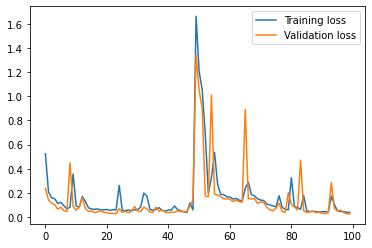

In [52]:
Mean_loss = np.mean(Besthistory.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(Besthistory.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(Besthistory.history['loss'], label='Training loss')
plt.plot(Besthistory.history['val_loss'], label='Validation loss')
plt.legend();

In [53]:
score = Bestmodel.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034771502017974854
Test accuracy: 0.9954291582107544
